In [4]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=100)
torch.set_printoptions(linewidth=100, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 100)

In [5]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


<Axes: >

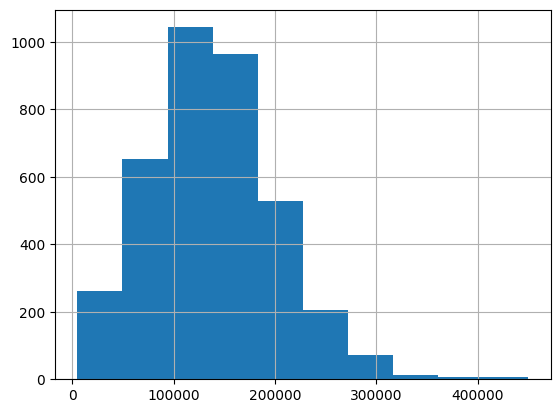

In [6]:
df['salary_in_usd'].hist()

In [7]:
pclasses = sorted(df.employment_type.unique())
pclasses

['CT', 'FL', 'FT', 'PT']

In [8]:
df.describe(include=[object])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [9]:
df = pd.get_dummies(df, columns=["experience_level","employment_type"], dtype=int)
df.columns

Index(['work_year', 'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location', 'company_size',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT'],
      dtype='object')

In [10]:
added_cols = ['experience_level_EN']
df[added_cols].head()

,experience_level_EN
0,0
1,0
2,0
3,0
4,0


In [11]:
from torch import tensor
t_dep = tensor(df.salary_in_usd)

In [12]:
indep_cols = ['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT']
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.]])

In [13]:
t_indep.shape

torch.Size([3755, 8])

In [14]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136])

In [15]:
t_indep*coeffs

tensor([[-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.2632, -0.0000,  0.0000,  0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.2632, -0.0000,  0.0000,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        ...,
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.4629,  0.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.4876,  0.0000],
   

In [16]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [17]:
t_indep*coeffs

tensor([[-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.2632, -0.0000,  0.0000,  0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.2632, -0.0000,  0.0000,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        ...,
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.4629,  0.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.4876,  0.0000],
   

In [18]:
t_indep = t_indep / vals

In [19]:
preds = (t_indep*coeffs).sum(axis=1)

In [20]:
preds[:10]

tensor([ 0.2615, -0.0223, -0.0223,  0.2615,  0.2615,  0.2615,  0.2615,  0.2615,  0.2615,  0.2615])

In [21]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(137570.0469)

In [22]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

### Gradient decent

In [23]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136],
       requires_grad=True)

In [24]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(137570.0469, grad_fn=<MeanBackward0>)

In [25]:
loss.backward()

In [26]:
coeffs.grad

tensor([-0.0852, -0.0304, -0.2144, -0.6700, -0.0027, -0.0027, -0.9901, -0.0045])

In [27]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.1704, -0.0607, -0.4288, -1.3401, -0.0053, -0.0053, -1.9803, -0.0091])

In [28]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(137569.5938)


In [30]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [31]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(3004, 751)

In [32]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [33]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [34]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [35]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [36]:
coeffs = train_model(18, lr=0.2)

137335.594; 137335.266; 137334.984; 137334.703; 137334.375; 137334.109; 137333.797; 137333.500; 137333.219; 137332.906; 137332.609; 137332.328; 137332.031; 137331.703; 137331.438; 137331.125; 137330.812; 137330.531; 

In [37]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'experience_level_EN': tensor(-0.1465),
 'experience_level_EX': tensor(0.2536),
 'experience_level_MI': tensor(0.9827),
 'experience_level_SE': tensor(2.2006),
 'employment_type_CT': tensor(-0.2561),
 'employment_type_FL': tensor(-0.3051),
 'employment_type_FT': tensor(4.0517),
 'employment_type_PT': tensor(0.3327)}

In [38]:
preds = calc_preds(coeffs, val_indep)

In [39]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
        True])

In [40]:
results.float().mean()

tensor(0.9947)

In [41]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.9947)